In [1]:
import pandas as pd
import numpy as np
import shap
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

e:\Machine Learning and Data Science\SHAP-Projects\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## create a dataset

In [2]:
np.random.seed(20)

In [4]:
df = pd.DataFrame(data={
    "knows_python": np.random.choice([0,1],size=1000),
    "knows_genai":np.random.choice([0,1],size=1000)
})

df.head()

,knows_python,knows_genai
0,1,1
1,0,1
2,1,0
3,1,0
4,0,0


In [5]:
df.shape

(1000, 2)

In [6]:
df["placement"] = df.any(axis=1).astype(int)

In [7]:
df.head()

,knows_python,knows_genai,placement
0,1,1,1
1,0,1,1
2,1,0,1
3,1,0,1
4,0,0,0


## Train model

In [8]:
X = df.drop(columns=["placement"])
y = df["placement"]

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [10]:
X_train.shape,X_test.shape

((800, 2), (200, 2))

In [11]:
# fit the model

gb = GradientBoostingClassifier(n_estimators=10,learning_rate=0.05,random_state=42)

gb.fit(X_train,y_train)

,"loss loss: {'log_loss', 'exponential'}, default='log_loss'The loss function to be optimized. 'log_loss' refers to binomial andmultinomial deviance, the same as used in logistic regression.It is a good choice for classification with probabilistic outputs.For loss 'exponential', gradient boosting recovers the AdaBoost algorithm.",'log_loss'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.For an example of the effects of this parameter and its interaction with``subsample``, see:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_regularization.py`.",0.05
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",10
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",1.0
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are'friedman_mse' for the mean squared error with improvement score byFriedman, 'squared_error' for mean squared error. The default value of'friedman_mse' is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",3
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, 

In [12]:
y_train_pred = gb.predict(X_train)
y_test_pred = gb.predict(X_test)

In [13]:
print("Train Accuracy: ",accuracy_score(y_train,y_train_pred))
print("Test Accuracy: ",accuracy_score(y_test,y_test_pred))

Train Accuracy:  1.0
Test Accuracy:  1.0


## Apply shap on the dataset

### All Background Data

In [14]:
background_data_all = X_train

In [15]:
X_test

,knows_python,knows_genai
805,1,1
910,1,0
258,0,0
55,1,1
75,1,0
...,...,...
65,1,1
484,0,1
214,1,0
178,0,1


In [16]:
row_1 = X_test.loc[[805],:]
row_2 = X_test.loc[[910],:]
row_3 = X_test.loc[[484],:]
row_4 = X_test.loc[[258],:]

In [17]:
row_1

,knows_python,knows_genai
805,1,1


In [18]:
row_2 

,knows_python,knows_genai
910,1,0


In [19]:
row_list = [row_1,row_2,row_3,row_4]
row_list

[     knows_python  knows_genai
 805             1            1,
      knows_python  knows_genai
 910             1            0,
      knows_python  knows_genai
 484             0            1,
      knows_python  knows_genai
 258             0            0]

In [20]:
# make the explainer

explainer = shap.TreeExplainer(model=gb,data = background_data_all,model_output="probability")

In [21]:
# print the base value

explainer.expected_value

np.float64(0.7343836608007343)

In [ ]:
# shap values for the first row
shap_values = explainer(row_1)

shap_values # explanation

.values =
array([[0.05233757, 0.05233757]])

.base_values =
array([0.73438366])

.data =
array([[1, 1]])

In [26]:
# print result

display(row_1)
print()
print(f"Row Prediction: {gb.predict(row_1).item()}")
print(f"Row Prediction: {gb.predict_proba(row_1).item(1)}")
print()
print(f"Base Value: {shap_values.base_values.item()}")
print(f"shap values (knows_python,knows_genai): {shap_values.values.ravel()}")

,knows_python,knows_genai
805,1,1



Row Prediction: 1
Row Prediction: 0.8390588094382317

Base Value: 0.7343836608007343
shap values (knows_python,knows_genai): [0.05233757 0.05233757]


In [27]:
shap_values[0]

.values =
array([0.05233757, 0.05233757])

.base_values =
np.float64(0.7343836608007343)

.data =
array([1, 1])

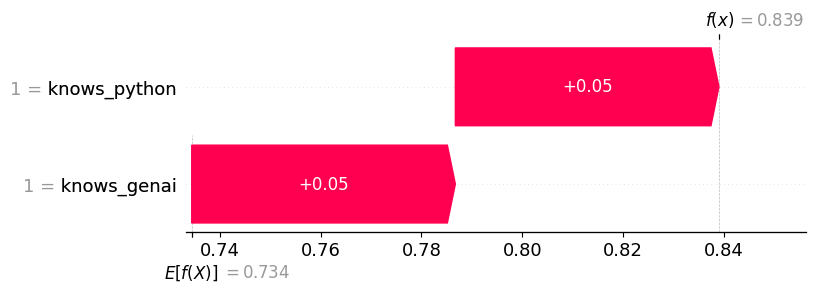

In [28]:
shap.plots.waterfall(shap_values[0])

In [30]:
def calculate_and_plot_shap(background_data,test_case):

    # make explainer

    explainer = shap.TreeExplainer(model=gb,data=background_data,model_output="probability")

    # calculate the shap
    shap_values = explainer(test_case)

    # display
    display(test_case)
    print()
    print(f"Row Prediction: {gb.predict(test_case).item()}")
    print(f"Row Prediction: {gb.predict_proba(test_case).item(1)}")
    print()
    print(f"Base Value: {shap_values.base_values.item()}")
    print(f"shap values (knows_python,knows_genai): {shap_values.values.ravel()}")

    # plot
    shap.plots.waterfall(shap_values[0])
    

,knows_python,knows_genai
805,1,1



Row Prediction: 1
Row Prediction: 0.8390588094382317

Base Value: 0.7343836608007343
shap values (knows_python,knows_genai): [0.05233757 0.05233757]


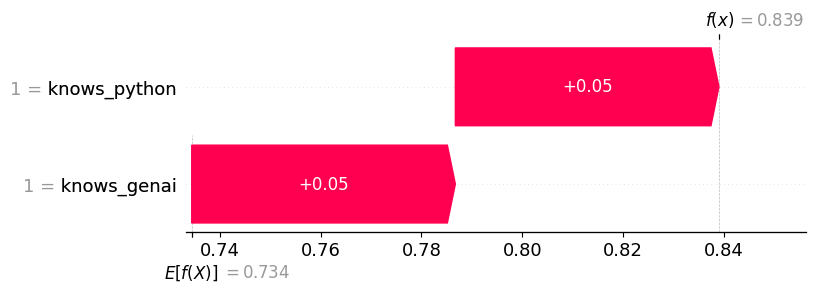

In [31]:
calculate_and_plot_shap(background_data_all,row_1)

Row number: 1


,knows_python,knows_genai
805,1,1



Row Prediction: 1
Row Prediction: 0.8390588094382317

Base Value: 0.7343836608007343
shap values (knows_python,knows_genai): [0.05233757 0.05233757]


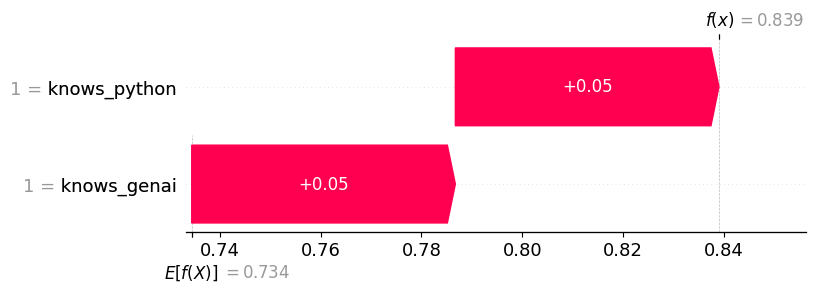



Row number: 2


,knows_python,knows_genai
910,1,0



Row Prediction: 1
Row Prediction: 0.8390588094382317

Base Value: 0.7343836608007343
shap values (knows_python,knows_genai): [ 0.31442038 -0.20974523]


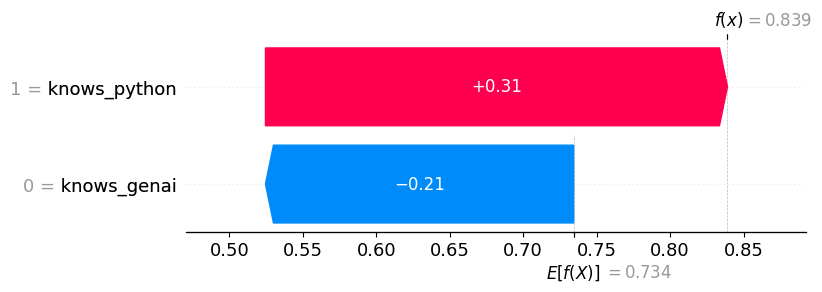



Row number: 3


,knows_python,knows_genai
484,0,1



Row Prediction: 1
Row Prediction: 0.8390588094382315

Base Value: 0.7343836608007343
shap values (knows_python,knows_genai): [-0.26694848  0.37162363]


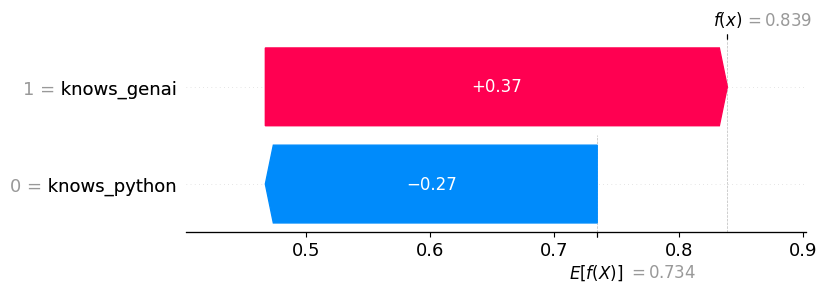



Row number: 4


,knows_python,knows_genai
258,0,0



Row Prediction: 0
Row Prediction: 0.43646208390939595

Base Value: 0.7343836608007343
shap values (knows_python,knows_genai): [-0.16103869 -0.13688288]


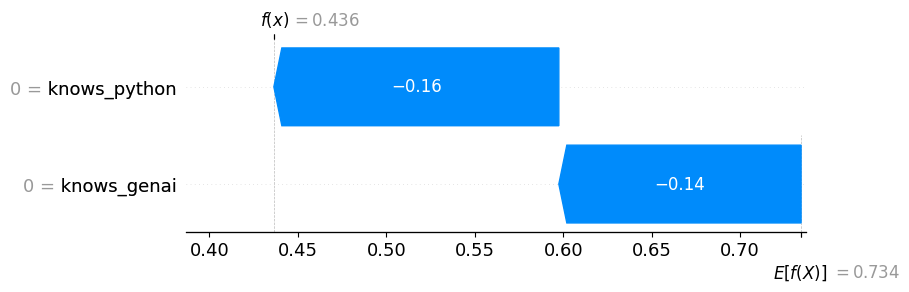

In [32]:
for num,row in enumerate(row_list,start=1):
    print(f"Row number: {num}")
    calculate_and_plot_shap(background_data_all,row)
    print("\n")

### Only Positive Background Data

In [33]:
background_data_pos = X_train.loc[y_train == 1,:]

Row Number: 1


,knows_python,knows_genai
805,1,1



Row Prediction: 1
Row Prediction: 0.8390588094382317

Base Value: 0.8390588094382315
shap values (knows_python,knows_genai): [0. 0.]


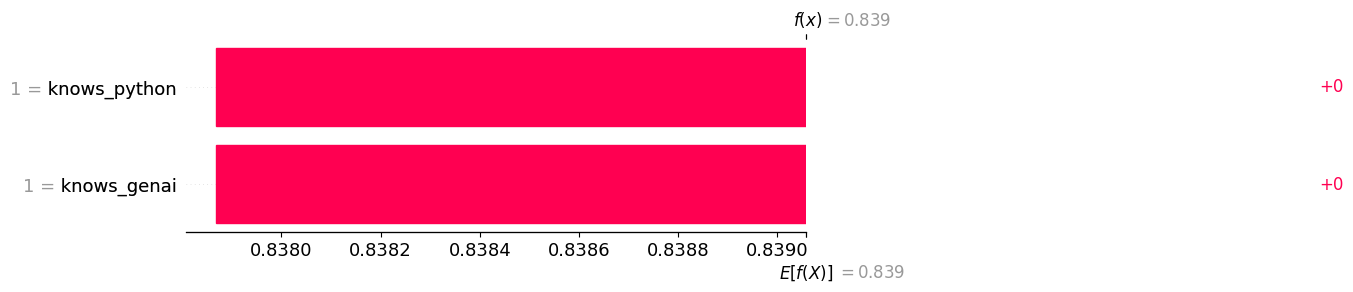



Row Number: 2


,knows_python,knows_genai
910,1,0



Row Prediction: 1
Row Prediction: 0.8390588094382317

Base Value: 0.8390588094382315
shap values (knows_python,knows_genai): [ 0.31461785 -0.31461785]


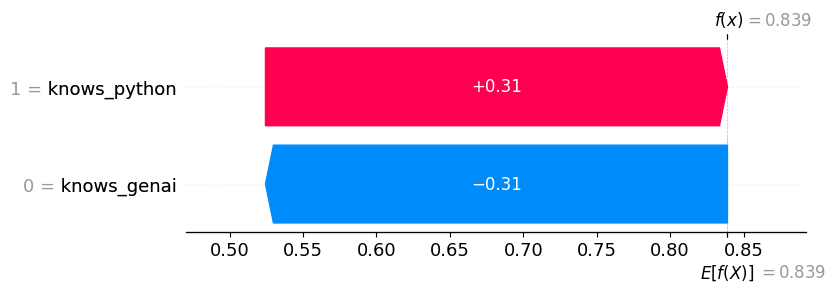



Row Number: 3


,knows_python,knows_genai
484,0,1



Row Prediction: 1
Row Prediction: 0.8390588094382315

Base Value: 0.8390588094382315
shap values (knows_python,knows_genai): [-0.24788073  0.24788073]


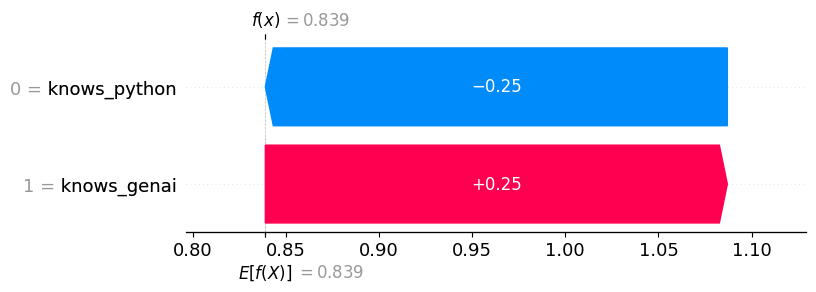



Row Number: 4


,knows_python,knows_genai
258,0,0



Row Prediction: 0
Row Prediction: 0.43646208390939595

Base Value: 0.8390588094382315
shap values (knows_python,knows_genai): [-0.18720747 -0.21538924]


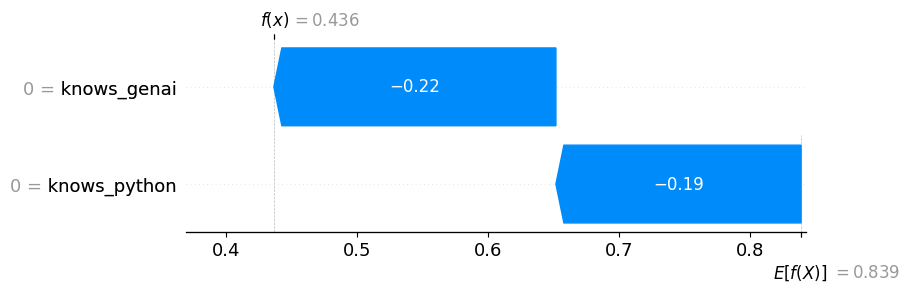

In [34]:
for num,row in enumerate(row_list,start=1):
    print(f"Row Number: {num}")
    calculate_and_plot_shap(background_data_pos,row)
    print("\n")

### Only Negative Background data

In [35]:
background_data_neg = X_train.loc[y_train == 0,:]

Row Number: 1


,knows_python,knows_genai
805,1,1



Row Prediction: 1
Row Prediction: 0.8390588094382317

Base Value: 0.4364620839093959
shap values (knows_python,knows_genai): [0.20129836 0.20129836]


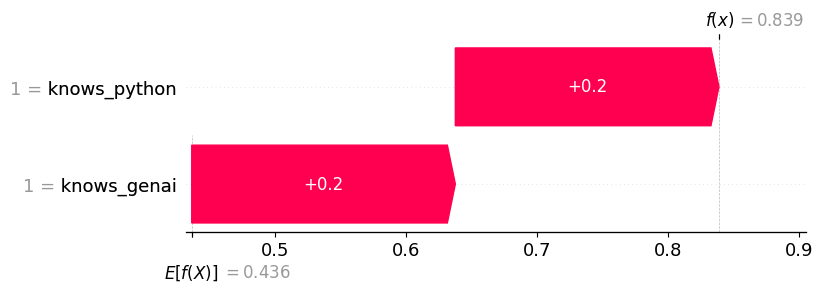



Row Number: 2


,knows_python,knows_genai
910,1,0



Row Prediction: 1
Row Prediction: 0.8390588094382317

Base Value: 0.4364620839093959
shap values (knows_python,knows_genai): [0.40259672 0.        ]


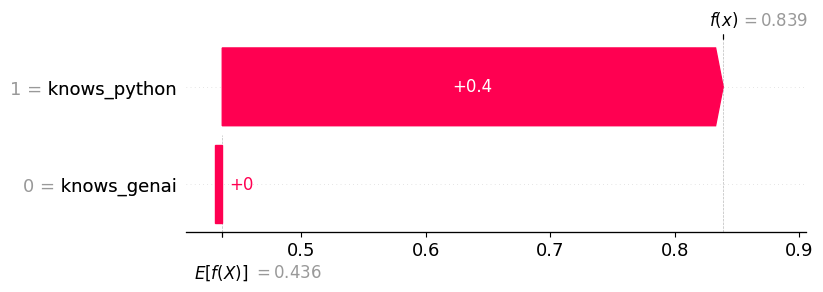



Row Number: 3


,knows_python,knows_genai
484,0,1



Row Prediction: 1
Row Prediction: 0.8390588094382315

Base Value: 0.4364620839093959
shap values (knows_python,knows_genai): [0.         0.40259672]


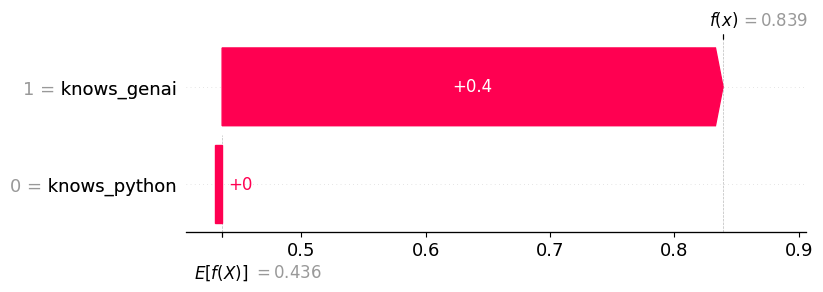



Row Number: 4


,knows_python,knows_genai
258,0,0



Row Prediction: 0
Row Prediction: 0.43646208390939595

Base Value: 0.4364620839093959
shap values (knows_python,knows_genai): [0. 0.]


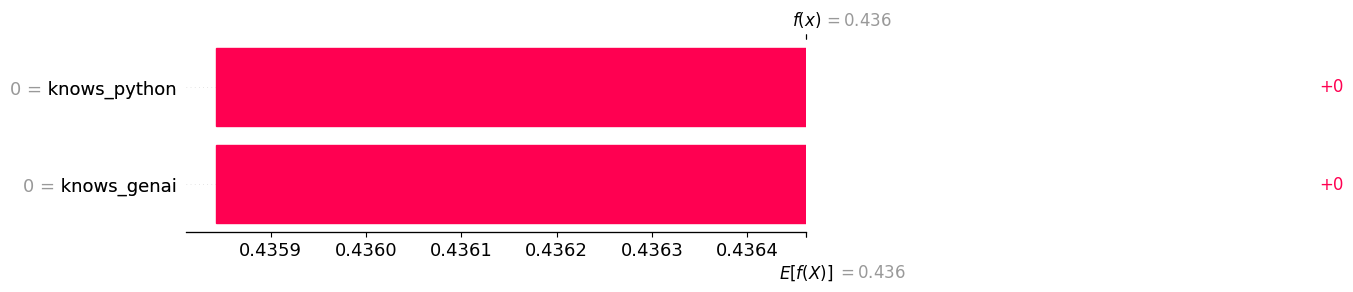

In [36]:
for num,row in enumerate(row_list,start=1):
    print(f"Row Number: {num}")
    calculate_and_plot_shap(background_data_neg,row)
    print("\n")